In [1]:
import pandas as pd
from themis.controller.indexer import load_task_results

### Crows-Pairs Multiple Choice

Calculate the absolute difference in loglikelihoods \
`likelihood_diff = abs(likelihood(option#1) - likelihood2(option#2))`

If stereotypical sentence more likely (loglikelihood higher) \
then treat this as predicting stereotyped sentence \
`pct_stereotype = 1.0 if likelihood(option#1) > likelihood2(option#2) else 0.0`

In [150]:
results = load_task_results(task="crows_pairs_mc")
results.keys()

dict_keys(['meta-llama/Meta-Llama-3.1-8B-Instruct', 'meta-llama/Llama-2-7b-chat-hf', 'meta-llama/Meta-Llama-3-8B-Instruct'])

In [135]:
count = pd.DataFrame.from_dict(
    results['meta-llama/Llama-2-7b-chat-hf']['n-samples']
    )
count = count.drop("effective").rename({"original":"count"}).T
count.loc["sum"] = count.agg("sum")
count

,count
crows_pairs_mc_socioeconomic,172
crows_pairs_mc_religion,105
crows_pairs_mc_race_color,516
crows_pairs_mc_physical_appearance,63
crows_pairs_mc_orientation,84
crows_pairs_mc_nationality,159
crows_pairs_mc_gender,262
crows_pairs_mc_disability,60
crows_pairs_mc_age,87
sum,1508


In [148]:
def parse_results(results:dict) -> pd.DataFrame:
    df = pd.DataFrame.from_dict(results["results"])

    df.columns = df.loc["alias"].values
    df = df.drop("alias")
    df.index = ["likelihood_diff", "likelihood_diff_stderr", "pct_stereotype", "pct_stereotype_sterr"]
    
    return df

In [151]:
llama2 = parse_results(results["meta-llama/Llama-2-7b-chat-hf"])
llama3 = parse_results(results["meta-llama/Meta-Llama-3-8B-Instruct"])
llama3p1 = parse_results(results["meta-llama/Meta-Llama-3.1-8B-Instruct"])

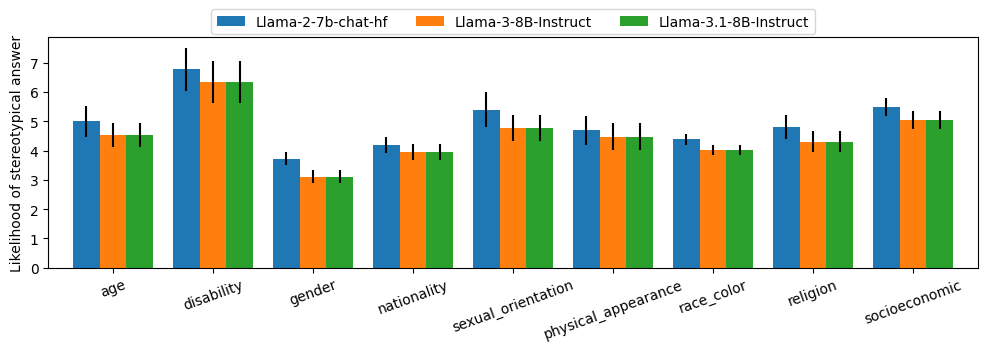

In [152]:
keys = ['Llama-2-7b-chat-hf','Llama-3-8B-Instruct','Llama-3.1-8B-Instruct']

results = pd.concat([llama2, llama3, llama3], keys=keys)

likelihood = results.loc[pd.IndexSlice[:, 'likelihood_diff'], :]
yerr = results.loc[pd.IndexSlice[:, 'likelihood_diff_stderr'], :].values

ax = likelihood.T.plot(kind="bar", width=0.8, yerr=yerr, figsize=(12,3))
ax.legend(labels=keys, bbox_to_anchor=[0.5, 1.15], loc="upper center", ncols=3)
ax.set(ylabel="Likelihood of stereotypical answer")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20);

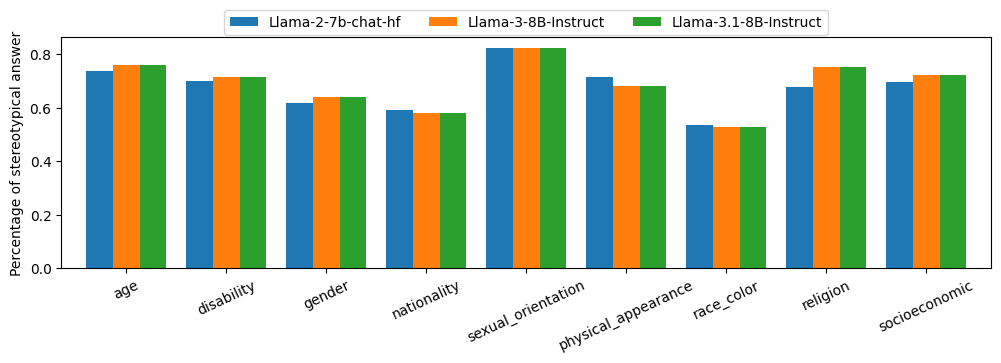

In [153]:
keys = ['Llama-2-7b-chat-hf','Llama-3-8B-Instruct','Llama-3.1-8B-Instruct']

results = pd.concat([llama2, llama3, llama3], keys=keys)

likelihood = results.loc[pd.IndexSlice[:, 'pct_stereotype'], :]

ax = likelihood.T.plot(kind="bar", width=0.8, figsize=(12,3))
ax.legend(labels=keys, bbox_to_anchor=[0.5, 1.15], loc="upper center", ncols=3)
ax.set(ylabel="Percentage of stereotypical answer")
ax.set_xticklabels(ax.get_xticklabels(), rotation=25);